In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ds2018 = pd.read_csv('shootings_2018.csv')
ds2019 = pd.read_csv('shootings_2019.csv')
ds2020 = pd.read_csv('shootings_2020.csv')
ds2021 = pd.read_csv('shootings_2021.csv')

In [3]:
ds2018_2021 = [ds2018, ds2019, ds2020, ds2021]
ms = pd.concat(ds2018_2021)
ms

,Date,State,Dead,Injured,Total,Description
0,31/12/2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,29/12/2018,Ohio,1,3,4,One person was killed and three people were wo...
2,28/12/2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,24/12/2018,Louisiana,2,2,4,Three people were killed and two others were w...
4,23/12/2018,Missouri,0,7,7,Seven people were wounded during a shooting at...
...,...,...,...,...,...,...
689,03/01/2021,Louisiana,2,3,5,Two groups of men opened fire at one another i...
690,01/01/2021,Illinois,0,4,4,Four people were wounded in an early morning s...
691,01/01/2021,Iowa,1,4,5,A woman was killed and four others injured aft...
692,01/01/2021,Texas,1,3,4,A man was killed and three others injured in a...


In [4]:
ms.reset_index()

,index,Date,State,Dead,Injured,Total,Description
0,0,31/12/2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,1,29/12/2018,Ohio,1,3,4,One person was killed and three people were wo...
2,2,28/12/2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,3,24/12/2018,Louisiana,2,2,4,Three people were killed and two others were w...
4,4,23/12/2018,Missouri,0,7,7,Seven people were wounded during a shooting at...
...,...,...,...,...,...,...,...
2067,689,03/01/2021,Louisiana,2,3,5,Two groups of men opened fire at one another i...
2068,690,01/01/2021,Illinois,0,4,4,Four people were wounded in an early morning s...
2069,691,01/01/2021,Iowa,1,4,5,A woman was killed and four others injured aft...
2070,692,01/01/2021,Texas,1,3,4,A man was killed and three others injured in a...


In [5]:
ms = ms.sort_values('Date').reset_index()

In [6]:
ms.head()

,index,Date,State,Dead,Injured,Total,Description
0,321,01/01/2018,Alabama,1,3,4,A 21-year-old was killed and three others were...
1,440,01/01/2019,Florida,0,5,5,Five people were shot and wounded around 3am l...
2,439,01/01/2019,South Carolina,0,5,5,Five people were shot and wounded outside of a...
3,614,01/01/2020,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin..."
4,613,01/01/2020,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...


In [7]:
ms = ms.drop('index', axis=1)

In [8]:
ms.value_counts('State')

State
Illinois                        232
California                      161
Texas                           148
Florida                         113
Pennsylvania                    100
New York                         98
Louisiana                        95
Ohio                             81
Michigan                         70
Missouri                         69
North Carolina                   68
Maryland                         67
Georgia                          67
Alabama                          59
Tennessee                        59
South Carolina                   50
New Jersey                       46
Virginia                         42
Indiana                          41
Mississippi                      39
Colorado                         35
Wisconsin                        29
Washington, D.C.                 29
Arkansas                         28
Kentucky                         25
Minnesota                        20
Arizona                          19
Washington            

In [9]:
ms['State'] = ms['State'].replace(['United States Virgin Islands'], 'Virgin Islands')
ms['State'] = ms['State'].replace(['Washington, D.C.'], 'District of Columbia')

In [10]:
ms.describe()

,Dead,Injured,Total
count,2072.000000,2072.000000,2072.000000
mean,1.027027,4.066602,5.092181
std,1.539201,2.220445,2.446866
min,0.000000,0.000000,2.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,1.000000,5.000000,5.000000
max,23.000000,27.000000,46.000000


In [11]:
ms['Month'] = pd.DatetimeIndex(ms['Date']).month
ms['Year'] = pd.DatetimeIndex(ms['Date']).year
ms

,Date,State,Dead,Injured,Total,Description,Month,Year
0,01/01/2018,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018
1,01/01/2019,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019
2,01/01/2019,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019
3,01/01/2020,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020
4,01/01/2020,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020
...,...,...,...,...,...,...,...,...
2067,31/12/2020,Oregon,0,4,4,Four people were wounded after a shooting at a...,12,2020
2068,31/12/2020,Indiana,1,3,4,A shooting unfolded outside a nightclub on New...,12,2020
2069,31/12/2021,Mississippi,4,3,7,"During an outdoor New Year's Eve party, a phys...",12,2021
2070,31/12/2021,California,0,6,6,Six shoppers were wounded at a grocery superma...,12,2021


In [12]:
ms['Date'] = pd.to_datetime(ms['Date'])
ms.head()

,Date,State,Dead,Injured,Total,Description,Month,Year
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020


In [13]:
ms['WeekDay'] = ms['Date'].dt.dayofweek
ms

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2
...,...,...,...,...,...,...,...,...,...
2067,2020-12-31,Oregon,0,4,4,Four people were wounded after a shooting at a...,12,2020,3
2068,2020-12-31,Indiana,1,3,4,A shooting unfolded outside a nightclub on New...,12,2020,3
2069,2021-12-31,Mississippi,4,3,7,"During an outdoor New Year's Eve party, a phys...",12,2021,4
2070,2021-12-31,California,0,6,6,Six shoppers were wounded at a grocery superma...,12,2021,4


In [14]:
ms[(ms['WeekDay'] == 5) |( ms['WeekDay'] == 6)]

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay
14,2021-01-02,New York,1,3,4,A man was killed and a woman and two men injur...,1,2021,5
18,2019-01-05,Massachusetts,1,3,4,One person was killed and three were wounded w...,1,2019,5
26,2019-01-06,Virginia,1,3,4,One person was killed and three were criticall...,1,2019,6
27,2019-01-06,Georgia,0,4,4,Three men and a woman were injured after a sus...,1,2019,6
28,2019-01-06,Illinois,0,4,4,An adult male and three teenagers were wounded...,1,2019,6
...,...,...,...,...,...,...,...,...,...
2061,2021-10-31,Kentucky,2,2,4,Two cousins working as security were shot and ...,10,2021,6
2062,2021-10-31,Texas,1,9,10,A woman was shot and killed and nine injured a...,10,2021,6
2063,2021-10-31,Illinois,1,3,4,Four people were shot just after midnight on H...,10,2021,6
2064,2021-10-31,Illinois,2,12,14,Two people were killed and several wounded aft...,10,2021,6


In [15]:
by_day = ms.groupby('Date').count()['Description'].to_frame()

In [16]:
by_day = by_day.reset_index()

In [17]:
by_day.head()

,Date,Description
0,2018-01-01,1
1,2018-01-04,2
2,2018-01-05,1
3,2018-01-07,1
4,2018-01-09,1


In [18]:
by_day.describe()

,Description
count,980.000000
mean,2.114286
std,1.496745
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,16.000000


In [19]:
by_day[by_day['Description'] == 16]

,Date,Description
505,2020-05-07,16


In [20]:
by_day[by_day['Description'] == 11]

,Date,Description
762,2021-04-07,11


In [21]:
by_day.sort_values('Description')

,Date,Description
0,2018-01-01,1
703,2021-01-18,1
704,2021-01-20,1
353,2019-09-04,1
352,2019-09-02,1
...,...,...
924,2021-10-17,8
519,2020-05-23,9
542,2020-06-20,9
762,2021-04-07,11


In [22]:
by_day_dist = by_day.groupby('Description').count().reset_index()
by_day_dist

,Description,Date
0,1,443
1,2,265
2,3,134
3,4,68
4,5,31
5,6,24
6,7,7
7,8,4
8,9,2
9,11,1


In [23]:
#Como a lista só computa os dias em que houveram de fato os atentados, houveram 461 no período em que não ocorream.
zero = {'Description' : 0, 'Date': 461}
by_day_dist.append(zero, ignore_index=True)

,Description,Date
0,1,443
1,2,265
2,3,134
3,4,68
4,5,31
5,6,24
6,7,7
7,8,4
8,9,2
9,11,1


In [24]:
by_day_dist = by_day_dist.sort_values('Description')
by_day_dist

,Description,Date
0,1,443
1,2,265
2,3,134
3,4,68
4,5,31
5,6,24
6,7,7
7,8,4
8,9,2
9,11,1


In [25]:
ms.head()

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2


In [26]:
ms['WeekOfYear'] = ms['Date'].dt.weekofyear

<ipython-input-26-3cc2e345f563>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  ms['WeekOfYear'] = ms['Date'].dt.weekofyear


In [27]:
ms.head()

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay,WeekOfYear
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0,1
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1,1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1,1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2,1
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2,1


In [28]:
ms['YearWeek'] = ms['Year'].astype(str) + ' - ' + ms['WeekOfYear'].astype(str)
ms.head()

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay,WeekOfYear,YearWeek
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0,1,2018 - 1
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1,1,2019 - 1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1,1,2019 - 1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2,1,2020 - 1
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2,1,2020 - 1


In [29]:
ms

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay,WeekOfYear,YearWeek
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0,1,2018 - 1
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1,1,2019 - 1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1,1,2019 - 1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2,1,2020 - 1
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2,1,2020 - 1
...,...,...,...,...,...,...,...,...,...,...,...
2067,2020-12-31,Oregon,0,4,4,Four people were wounded after a shooting at a...,12,2020,3,53,2020 - 53
2068,2020-12-31,Indiana,1,3,4,A shooting unfolded outside a nightclub on New...,12,2020,3,53,2020 - 53
2069,2021-12-31,Mississippi,4,3,7,"During an outdoor New Year's Eve party, a phys...",12,2021,4,52,2021 - 52
2070,2021-12-31,California,0,6,6,Six shoppers were wounded at a grocery superma...,12,2021,4,52,2021 - 52


In [30]:
for_tendency_week = ms.groupby(['Year','WeekOfYear']).count()['Total'].to_frame().reset_index()
for_tendency_week

,Year,WeekOfYear,Total
0,2018,1,6
1,2018,2,7
2,2018,3,4
3,2018,4,8
4,2018,5,2
...,...,...,...
205,2021,49,20
206,2021,50,8
207,2021,51,9
208,2021,52,8


In [31]:
import matplotlib.pyplot as plt

In [32]:
ms['Year'].value_counts().to_frame()

,Year
2021,694
2020,615
2019,441
2018,322


In [33]:
ms.groupby('Year').count()['Total']

Year
2018    322
2019    441
2020    615
2021    694
Name: Total, dtype: int64

In [34]:
ms.head()

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay,WeekOfYear,YearWeek
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0,1,2018 - 1
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1,1,2019 - 1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1,1,2019 - 1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2,1,2020 - 1
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2,1,2020 - 1


In [35]:
mes_anos = ms.groupby(['Year', 'Month']).count()['Total'].to_frame().reset_index()

In [36]:
mes_anos.head()

,Year,Month,Total
0,2018,1,25
1,2018,2,19
2,2018,3,19
3,2018,4,30
4,2018,5,26


<AxesSubplot:xlabel='Month', ylabel='Total'>

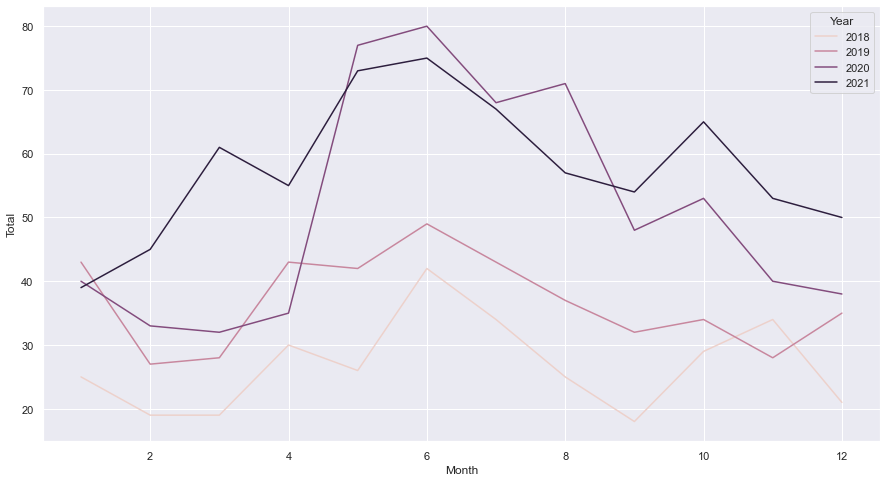

In [37]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Month', y='Total', data=mes_anos, hue='Year')

<AxesSubplot:xlabel='Month', ylabel='Total'>

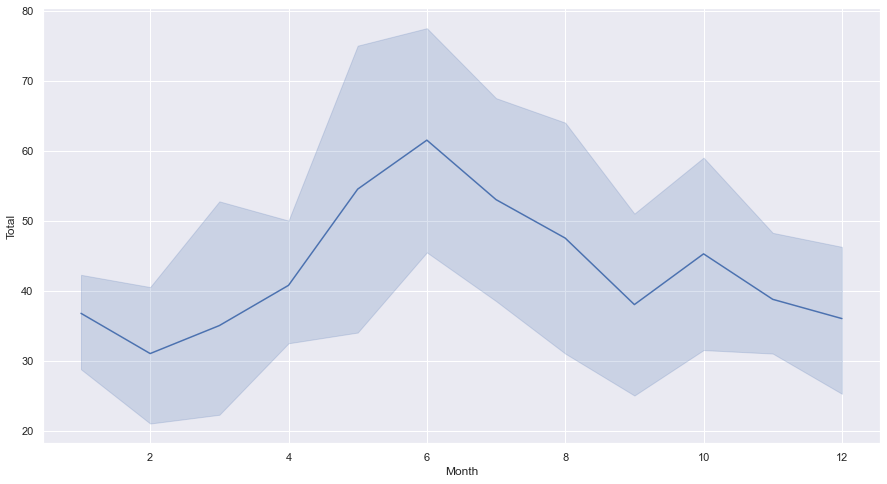

In [38]:
plt.style.use('ggplot')
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Month', y='Total', data=mes_anos)

In [39]:
ms.head()

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay,WeekOfYear,YearWeek
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0,1,2018 - 1
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1,1,2019 - 1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1,1,2019 - 1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2,1,2020 - 1
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2,1,2020 - 1


In [40]:
data_week = ms.groupby(['Year', 'Month', 'WeekDay']).count()['Total'].to_frame().reset_index()
data_week.head()

,Year,Month,WeekDay,Total
0,2018,1,0,2
1,2018,1,1,3
2,2018,1,2,3
3,2018,1,3,5
4,2018,1,4,2


<AxesSubplot:xlabel='WeekDay', ylabel='Total'>

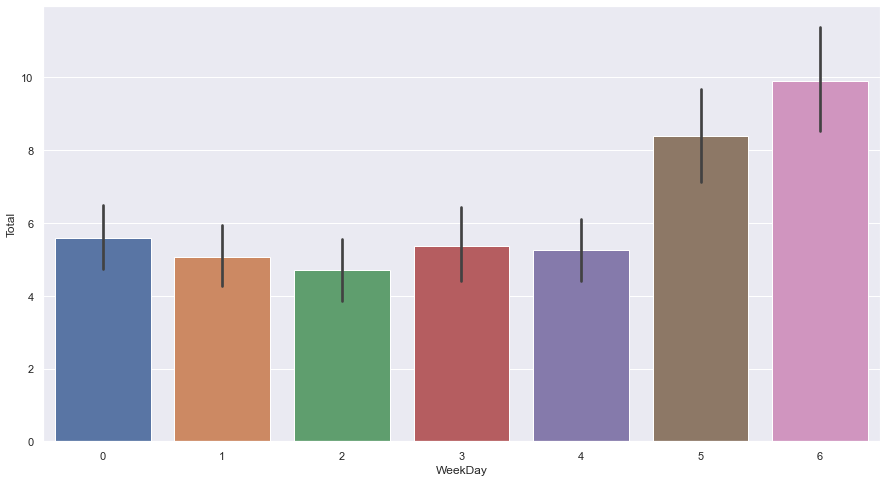

In [41]:
sns.barplot(x='WeekDay', y='Total', data=data_week)

In [42]:
desc_fds = ms[(ms['WeekDay'] == 5 )|( ms['WeekDay'] == 6)]['Description'].reset_index().drop('index', axis=1)
desc_fds.head()

,Description
0,A man was killed and a woman and two men injur...
1,One person was killed and three were wounded w...
2,One person was killed and three were criticall...
3,Three men and a woman were injured after a sus...
4,An adult male and three teenagers were wounded...


In [43]:
desc_fds['Description'][desc_fds['Description'].str.contains('party ')].reset_index()

,index,Description
0,10,Five adults and a teenager were wounded after ...
1,16,Six people were wounded in an early morning sh...
2,17,A man was killed and three wounded near a loca...
3,25,One person was killed and four other were woun...
4,54,Responding officers found three men killed and...
...,...,...
68,832,One person was killed and three wounded after ...
69,833,Two people were killed and five injured at a H...
70,852,Seven people were wounded at a party held in a...
71,853,"Four people were shot in a neighborhood, at a ..."


In [44]:
#ms.groupby(['State']).count()['Total'].to_frame().reset_index().sort_values('Total', ascending=False).sum()['Dead']
state_case_dead = ms.groupby(['State','Year']).agg({'Dead': ['count', 'sum']}).reset_index()
state_case_dead.head()

State  Year  Dead    
                 count sum
0  Alabama  2018    12  11
1  Alabama  2019    12  17
2  Alabama  2020    12  17
3  Alabama  2021    23  19
4   Alaska  2020     3   5

In [45]:
state_case_dead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   (State, )      172 non-null    object
 1   (Year, )       172 non-null    int64 
 2   (Dead, count)  172 non-null    int64 
 3   (Dead, sum)    172 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.5+ KB


In [46]:
state_case_dead['Occ'] = state_case_dead['Dead','count']
state_case_dead['Total_Dead'] = state_case_dead['Dead','sum']
state_case_dead.head()

State  Year  Dead     Occ Total_Dead
                 count sum               
0  Alabama  2018    12  11  12         11
1  Alabama  2019    12  17  12         17
2  Alabama  2020    12  17  12         17
3  Alabama  2021    23  19  23         19
4   Alaska  2020     3   5   3          5

In [47]:
state_case_dead.head()

State  Year  Dead     Occ Total_Dead
                 count sum               
0  Alabama  2018    12  11  12         11
1  Alabama  2019    12  17  12         17
2  Alabama  2020    12  17  12         17
3  Alabama  2021    23  19  23         19
4   Alaska  2020     3   5   3          5

In [48]:
state_case_dead = state_case_dead.drop('Dead', axis=1)
state_case_dead.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,State,Year,Occ,Total_Dead
,,,,
0,Alabama,2018,12,11
1,Alabama,2019,12,17
2,Alabama,2020,12,17
3,Alabama,2021,23,19
4,Alaska,2020,3,5


In [49]:
state_general = state_case_dead.groupby('State').sum()['Total_Dead'].to_frame().reset_index()
state_general

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,State,Total_Dead
0,Alabama,64
1,Alaska,6
2,Arizona,34
3,Arkansas,26
4,California,206
5,Colorado,49
6,Connecticut,7
7,Delaware,13
8,District of Columbia,19
9,Florida,137


In [50]:
state_general = state_general.sort_values('Total_Dead', ascending=False).reset_index().drop('index',axis=1)
state_general.head()

,State,Total_Dead
0,Texas,218
1,California,206
2,Illinois,159
3,Florida,137
4,North Carolina,90


In [51]:
state_general = state_general.sort_values('Total_Dead')
state_general.head()

,State,Total_Dead
50,New Hampshire,0
47,Rhode Island,2
49,Wyoming,2
48,Virgin Islands,2
46,Hawaii,3


In [52]:
state_general.describe()

,Total_Dead
count,51.000000
mean,41.725490
std,49.314533
min,0.000000
25%,7.000000
50%,25.000000
75%,61.500000
max,218.000000


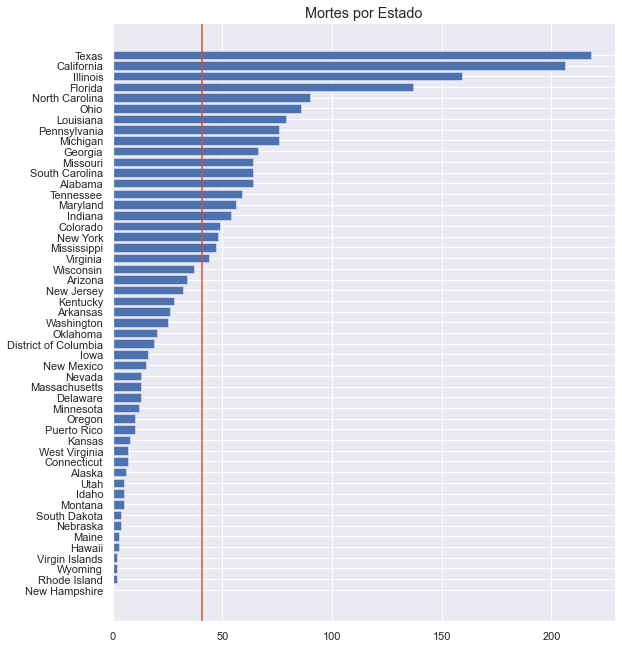

In [53]:
# Initialize a Figure and an Axes
fig, ax = plt.subplots()
plt.style.use('ggplot')

# Fig size
fig.set_size_inches(9,11)

# Create horizontal bars
ax.barh(y=state_general['State'], width=state_general['Total_Dead'])
plt.axvline(x=40.92);


# Add title
ax.set_title('Mortes por Estado');
plt.savefig("Mortes por estado.pdf", format="pdf", bbox_inches="tight")




In [54]:
state_case_dead = state_case_dead.sort_values('Occ')
state_case_dead

,State,Year,Occ,Total_Dead
,,,,
171,Wyoming,2019,1,2
26,Delaware,2018,1,5
109,New Mexico,2021,1,1
82,Minnesota,2019,1,0
44,Idaho,2021,1,3
...,...,...,...,...
15,California,2019,44,55
17,California,2021,46,61
150,Texas,2021,57,66


In [55]:
state_occ = state_case_dead.groupby('State').sum()['Occ'].to_frame().reset_index().sort_values('Occ')
state_occ.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,State,Occ
50,Wyoming,1
29,New Hampshire,1
19,Maine,1
11,Hawaii,1
38,Puerto Rico,2


In [56]:
state_occ = state_occ.reset_index().drop('index', axis=1)
state_occ.head()

,State,Occ
0,Wyoming,1
1,New Hampshire,1
2,Maine,1
3,Hawaii,1
4,Puerto Rico,2


In [57]:
state_occ.describe()

,Occ
count,51.000000
mean,40.627451
std,47.505773
min,1.000000
25%,5.000000
50%,20.000000
75%,63.000000
max,232.000000


In [58]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

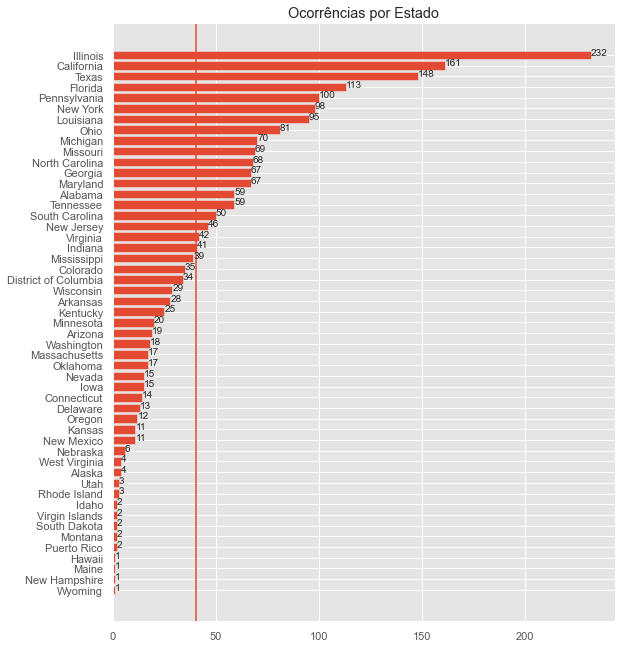

In [59]:
# Initialize a Figure and an Axes
fig, ax = plt.subplots()
plt.style.use('ggplot')

# Fig size
fig.set_size_inches(9,11)

# Create horizontal bars
ax.barh(y=state_occ['State'], width=state_occ['Occ'])
plt.axvline(x=40.627451);

# Add title
ax.set_title('Ocorrências por Estado');
for i in range(len(state_occ['State'])):
    plt.text(state_occ.loc[i,'Occ'], state_occ.loc[i,'State'], state_occ.loc[i,'Occ'], horizontalalignment='left')
    
plt.savefig("occ_per_state.pdf", transparent=True)

In [60]:
state_occ.head()

,State,Occ
0,Wyoming,1
1,New Hampshire,1
2,Maine,1
3,Hawaii,1
4,Puerto Rico,2


In [61]:
rank = pd.read_excel('state_rank.xlsx')
rank

,Gun Law Strength(Ranked),State,Grade,Gun Death Rate(Ranked),Gun Death Rate(per 100K)
0,1,California,A,44,8.5
1,2,New Jersey,A,48,5.0
2,3,Connecticut,A-,45,6.0
3,4,Hawaii,A-,50,3.4
4,8,Illinois,A-,27,14.1
5,7,Maryland,A-,33,13.5
6,5,Massachusetts,A-,49,3.7
7,6,New York,A-,46,5.3
8,13,Colorado,B,22,15.4
9,12,Delaware,B,25,14.3


In [62]:
ms.head()

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay,WeekOfYear,YearWeek
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0,1,2018 - 1
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1,1,2019 - 1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1,1,2019 - 1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2,1,2020 - 1
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2,1,2020 - 1


In [63]:
full_grade = pd.merge(ms, rank, how = 'inner', on='State')
full_grade.head()

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay,WeekOfYear,YearWeek,Gun Law Strength(Ranked),Grade,Gun Death Rate(Ranked),Gun Death Rate(per 100K)
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0,1,2018 - 1,31,F,5,23.6
1,2018-01-04,Alabama,1,4,5,A fifteen-year-old was killed and four other p...,1,2018,3,1,2018 - 1,31,F,5,23.6
2,2020-01-08,Alabama,0,4,4,Four men were injured after a shooting at an e...,1,2020,2,2,2020 - 2,31,F,5,23.6
3,2019-01-09,Alabama,0,7,7,Six adult males and a 15-year-old boy were wou...,1,2019,2,2,2019 - 2,31,F,5,23.6
4,2019-02-09,Alabama,5,0,5,A 14-year-old boy shot dead five family member...,2,2019,5,6,2019 - 6,31,F,5,23.6


In [64]:
scatter_plot = full_grade[['State','Dead','Total','Gun Law Strength(Ranked)']]
scatter_plot.head()

,State,Dead,Total,Gun Law Strength(Ranked)
0,Alabama,1,4,31
1,Alabama,1,5,31
2,Alabama,0,4,31
3,Alabama,0,7,31
4,Alabama,5,5,31


In [65]:
scatter_plot = scatter_plot.groupby(['State','Gun Law Strength(Ranked)']).agg(Dead_Sum = ('Dead','sum'), vit_sum = ('Total','sum'), occ_count = ('Total', 'count')).reset_index()
scatter_plot.head()

,State,Gun Law Strength(Ranked),Dead_Sum,vit_sum,occ_count
0,Alabama,31,64,286,59
1,Alaska,41,6,18,4
2,Arizona,42,34,115,19
3,Arkansas,50,26,128,28
4,California,1,206,842,161


In [66]:
info_states = pd.read_csv('estados_info.csv')
info_states.head()

,rank,State,Pop,Growth,Pop2021,Pop2010,growthSince2010,Percent,density
0,1,California,39664128,0.0013,39613493,37319502,0.0628,0.1180,254.6179
1,2,Texas,30097526,0.0124,29730311,25241971,0.1924,0.0896,115.2138
2,3,Florida,22177997,0.0106,21944577,18845537,0.1768,0.0660,413.5757
3,4,New York,19223191,-0.0040,19299981,19399878,-0.0091,0.0572,407.9105
4,5,Pennsylvania,12805190,0.0001,12804123,12711160,0.0074,0.0381,286.1943


In [67]:
all_state = pd.merge(scatter_plot, info_states, how = 'left', on='State')
all_state.head()

,State,Gun Law Strength(Ranked),Dead_Sum,vit_sum,occ_count,rank,Pop,Growth,Pop2021,Pop2010,growthSince2010,Percent,density
0,Alabama,31,64,286,59,24,4949697,0.0031,4934193,4785437,0.0343,0.0147,97.7332
1,Alaska,41,6,18,4,49,720763,-0.0050,724357,713910,0.0096,0.0021,1.2631
2,Arizona,42,34,115,19,14,7640796,0.0160,7520103,6407172,0.1925,0.0227,67.2641
3,Arkansas,50,26,128,28,34,3042017,0.0027,3033946,2921964,0.0411,0.0091,58.4610
4,California,1,206,842,161,1,39664128,0.0013,39613493,37319502,0.0628,0.1180,254.6179


In [68]:
all_state['Vit/100k'] = (100000*all_state['vit_sum'])/all_state['Pop']
all_state['Occ/100k'] = (100000*all_state['occ_count'])/all_state['Pop']
all_state.head()

,State,Gun Law Strength(Ranked),Dead_Sum,vit_sum,occ_count,rank,Pop,Growth,Pop2021,Pop2010,growthSince2010,Percent,density,Vit/100k,Occ/100k
0,Alabama,31,64,286,59,24,4949697,0.0031,4934193,4785437,0.0343,0.0147,97.7332,5.778131,1.191992
1,Alaska,41,6,18,4,49,720763,-0.0050,724357,713910,0.0096,0.0021,1.2631,2.497353,0.554967
2,Arizona,42,34,115,19,14,7640796,0.0160,7520103,6407172,0.1925,0.0227,67.2641,1.505079,0.248665
3,Arkansas,50,26,128,28,34,3042017,0.0027,3033946,2921964,0.0411,0.0091,58.4610,4.207735,0.920442
4,California,1,206,842,161,1,39664128,0.0013,39613493,37319502,0.0628,0.1180,254.6179,2.122825,0.405908


In [69]:
all_state['Dt/100k'] = (100000*all_state['Dead_Sum'])/all_state['Pop']

In [70]:
all_state = all_state.set_index('State')
all_state.head()

,Gun Law Strength(Ranked),Dead_Sum,vit_sum,occ_count,rank,Pop,Growth,Pop2021,Pop2010,growthSince2010,Percent,density,Vit/100k,Occ/100k,Dt/100k
State,,,,,,,,,,,,,,,
Alabama,31,64,286,59,24,4949697,0.0031,4934193,4785437,0.0343,0.0147,97.7332,5.778131,1.191992,1.293008
Alaska,41,6,18,4,49,720763,-0.0050,724357,713910,0.0096,0.0021,1.2631,2.497353,0.554967,0.832451
Arizona,42,34,115,19,14,7640796,0.0160,7520103,6407172,0.1925,0.0227,67.2641,1.505079,0.248665,0.444980
Arkansas,50,26,128,28,34,3042017,0.0027,3033946,2921964,0.0411,0.0091,58.4610,4.207735,0.920442,0.854696
California,1,206,842,161,1,39664128,0.0013,39613493,37319502,0.0628,0.1180,254.6179,2.122825,0.405908,0.519361


In [71]:
all_state.describe()['Dt/100k']

count    48.000000
mean      0.605776
std       0.391456
min       0.000000
25%       0.271443
50%       0.514363
75%       0.824612
max       1.711399
Name: Dt/100k, dtype: float64

In [72]:
all_state[all_state['Dt/100k'] > 1.7]

,Gun Law Strength(Ranked),Dead_Sum,vit_sum,occ_count,rank,Pop,Growth,Pop2021,Pop2010,growthSince2010,Percent,density,Vit/100k,Occ/100k,Dt/100k
State,,,,,,,,,,,,,,,
Louisiana,34,79,474,95,25,4616106,-0.0024,4627002,4544532,0.0157,0.0137,106.8444,10.268395,2.058012,1.711399


In [73]:
all_state.head()

,Gun Law Strength(Ranked),Dead_Sum,vit_sum,occ_count,rank,Pop,Growth,Pop2021,Pop2010,growthSince2010,Percent,density,Vit/100k,Occ/100k,Dt/100k
State,,,,,,,,,,,,,,,
Alabama,31,64,286,59,24,4949697,0.0031,4934193,4785437,0.0343,0.0147,97.7332,5.778131,1.191992,1.293008
Alaska,41,6,18,4,49,720763,-0.0050,724357,713910,0.0096,0.0021,1.2631,2.497353,0.554967,0.832451
Arizona,42,34,115,19,14,7640796,0.0160,7520103,6407172,0.1925,0.0227,67.2641,1.505079,0.248665,0.444980
Arkansas,50,26,128,28,34,3042017,0.0027,3033946,2921964,0.0411,0.0091,58.4610,4.207735,0.920442,0.854696
California,1,206,842,161,1,39664128,0.0013,39613493,37319502,0.0628,0.1180,254.6179,2.122825,0.405908,0.519361


In [74]:
top_19 = all_state[all_state['occ_count'] > 40.627451].sort_values('occ_count', ascending=False)
top_19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Illinois to Indiana
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gun Law Strength(Ranked)  19 non-null     int64  
 1   Dead_Sum                  19 non-null     int64  
 2   vit_sum                   19 non-null     int64  
 3   occ_count                 19 non-null     int64  
 4   rank                      19 non-null     int64  
 5   Pop                       19 non-null     int64  
 6   Growth                    19 non-null     float64
 7   Pop2021                   19 non-null     int64  
 8   Pop2010                   19 non-null     int64  
 9   growthSince2010           19 non-null     float64
 10  Percent                   19 non-null     float64
 11  density                   19 non-null     float64
 12  Vit/100k                  19 non-null     float64
 13  Occ/100k                  19 non-null     float64
 14  Dt/10

In [75]:
top_19 = top_19.reset_index()

In [76]:
#Dt/100k overall
dt_overall = (all_state['Dead_Sum'].sum()*100_000)/all_state['Pop'].sum()
dt_overall

0.6339554444625646

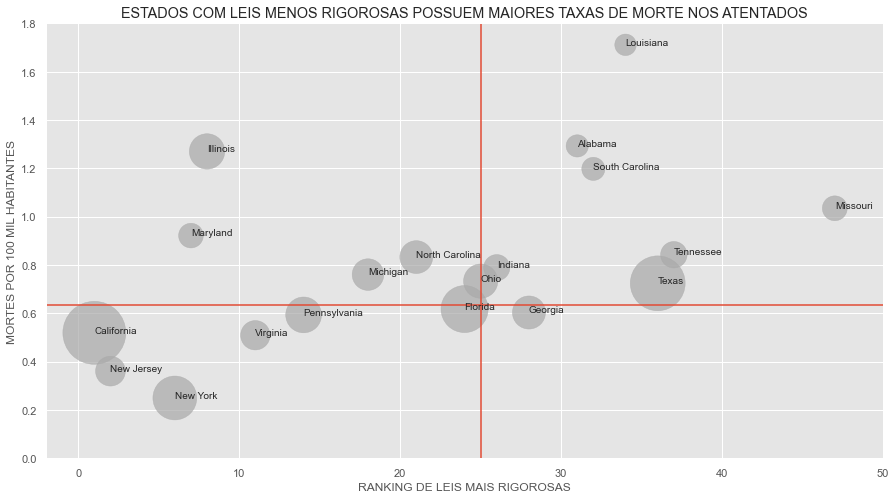

In [77]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.scatter(top_19['Gun Law Strength(Ranked)'], top_19['Dt/100k'],c='darkgray', s = top_19['Pop']/10000, alpha=0.7)
plt.axvline(x=25)
plt.axhline(y=dt_overall)
ax.set_xlabel('RANKING DE LEIS MAIS RIGOROSAS')
ax.set_ylabel('MORTES POR 100 MIL HABITANTES')
ax.set_title('ESTADOS COM LEIS MENOS RIGOROSAS POSSUEM MAIORES TAXAS DE MORTE NOS ATENTADOS')
ax.set_xlim(-2,50)
ax.set_ylim(0,1.8)


for i in range(len(top_19['State'])):
    plt.text(top_19.loc[i, 'Gun Law Strength(Ranked)'], top_19.loc[i, 'Dt/100k'], top_19.loc[i, 'State'])

plt.savefig("law_death_scatter.pdf", transparent=True)

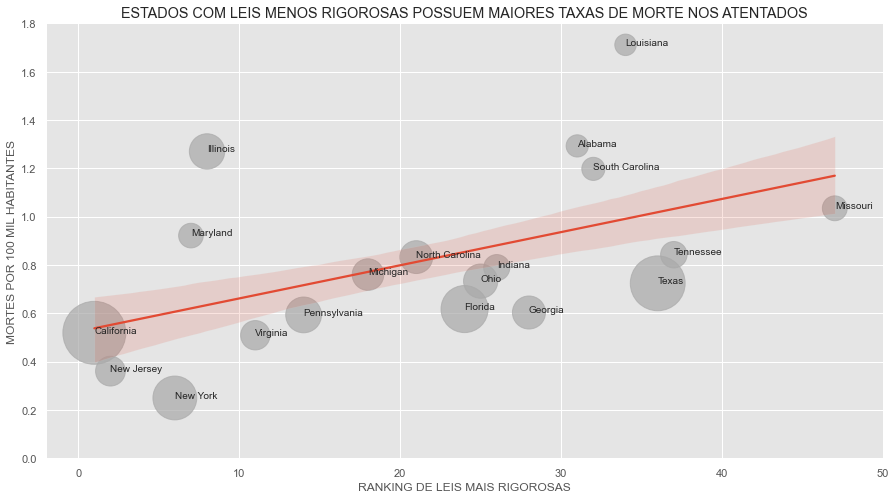

In [78]:
sns.regplot(x='Gun Law Strength(Ranked)', y='Dt/100k', data=top_19,ci=68,scatter_kws={"color":"darkgray","alpha":0.7,"s":top_19['Pop']/10000})
plt.xlabel('RANKING DE LEIS MAIS RIGOROSAS')
plt.ylabel('MORTES POR 100 MIL HABITANTES')
plt.title('ESTADOS COM LEIS MENOS RIGOROSAS POSSUEM MAIORES TAXAS DE MORTE NOS ATENTADOS')
plt.xlim(-2, 50)
plt.ylim(0, 1.8)

for i in range(len(top_19['State'])):
    plt.text(top_19.loc[i, 'Gun Law Strength(Ranked)'], top_19.loc[i, 'Dt/100k'], top_19.loc[i, 'State'])

plt.savefig("law_death_reg.pdf", transparent=True)

In [79]:
ms.head()

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay,WeekOfYear,YearWeek
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0,1,2018 - 1
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1,1,2019 - 1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1,1,2019 - 1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2,1,2020 - 1
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2,1,2020 - 1


In [80]:
ms.groupby(['WeekDay']).count()['Total'].reset_index()

,WeekDay,Total
0,0,263
1,1,238
2,2,216
3,3,242
4,4,252
5,5,395
6,6,466


In [81]:
((ms.groupby(['WeekDay']).count()['Total']/2072) * 100).reset_index()

,WeekDay,Total
0,0,12.693050
1,1,11.486486
2,2,10.424710
3,3,11.679537
4,4,12.162162
5,5,19.063707
6,6,22.490347


In [82]:
graph_week = ((ms.groupby(['WeekDay']).count()['Total']/2072) * 100).reset_index()
graph_week

,WeekDay,Total
0,0,12.693050
1,1,11.486486
2,2,10.424710
3,3,11.679537
4,4,12.162162
5,5,19.063707
6,6,22.490347


In [83]:
graph_week['Total'] = graph_week['Total'].round(1)

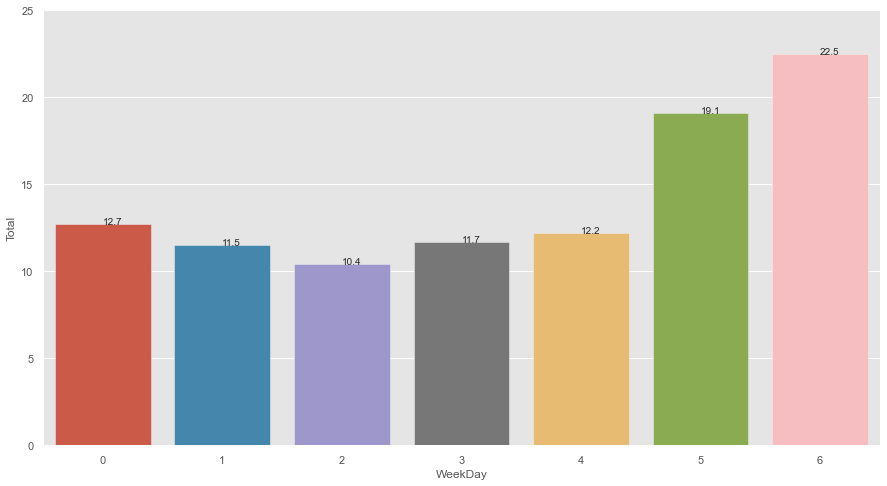

In [84]:
sns.barplot(x='WeekDay', y='Total', data=graph_week)
plt.ylim(0,25)
plt.xlim(-0.5,6.5)


for i in graph_week['WeekDay']:
    plt.text(graph_week.loc[i, 'WeekDay'], graph_week.loc[i, 'Total'], graph_week.loc[i, 'Total'])

plt.savefig("occ_week.pdf", transparent=True)

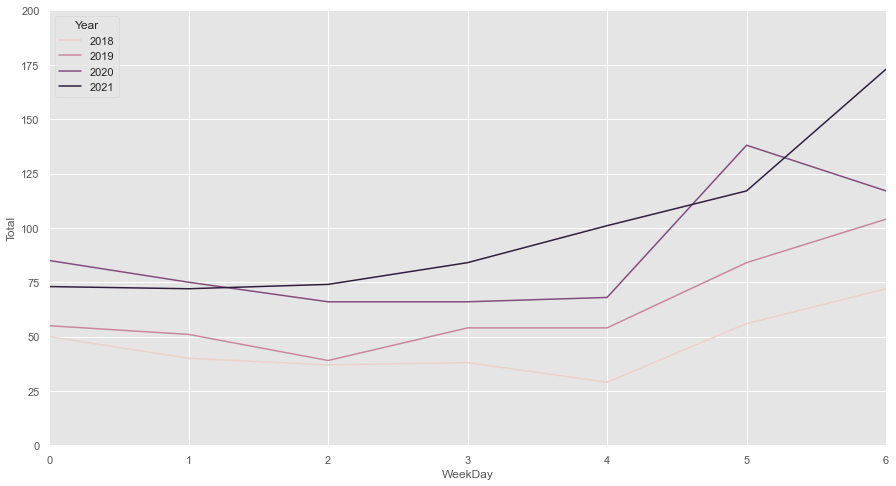

In [85]:
sns.lineplot(x='WeekDay', y='Total', ci=0, data=ms.groupby(['Year','WeekDay']).count()['Total'].reset_index(), hue = 'Year')
plt.ylim(0,200)
plt.xlim(0,6)
plt.savefig("week_trend.pdf", transparent=True)

In [86]:
ms.head()

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay,WeekOfYear,YearWeek
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0,1,2018 - 1
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1,1,2019 - 1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1,1,2019 - 1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2,1,2020 - 1
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2,1,2020 - 1


In [87]:
graph_month = ms.groupby(['Year','Month']).count()['Total'].reset_index()

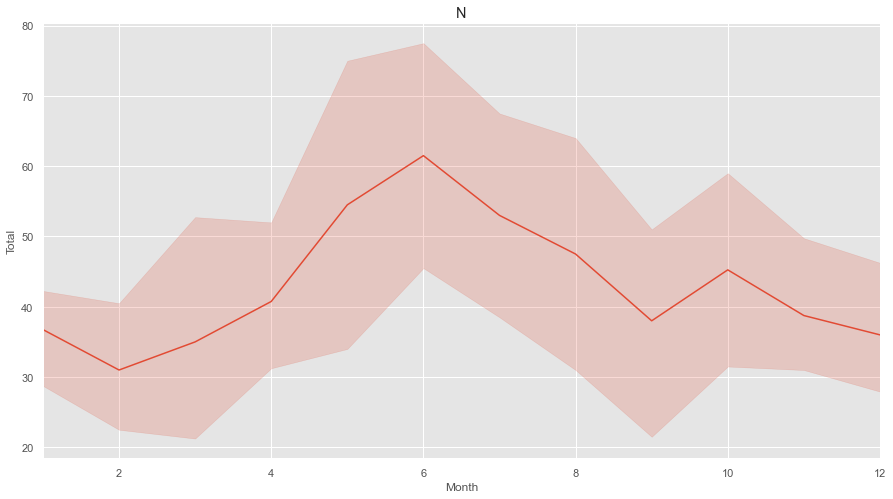

In [88]:
sns.lineplot(x='Month', y='Total', ci=95, data=graph_month)
#plt.ylim(50,300)
plt.xlim(1,12)

plt.title('N')
plt.savefig("year_trend.pdf", transparent=True)

Text(0.5, 1.0, 'N')

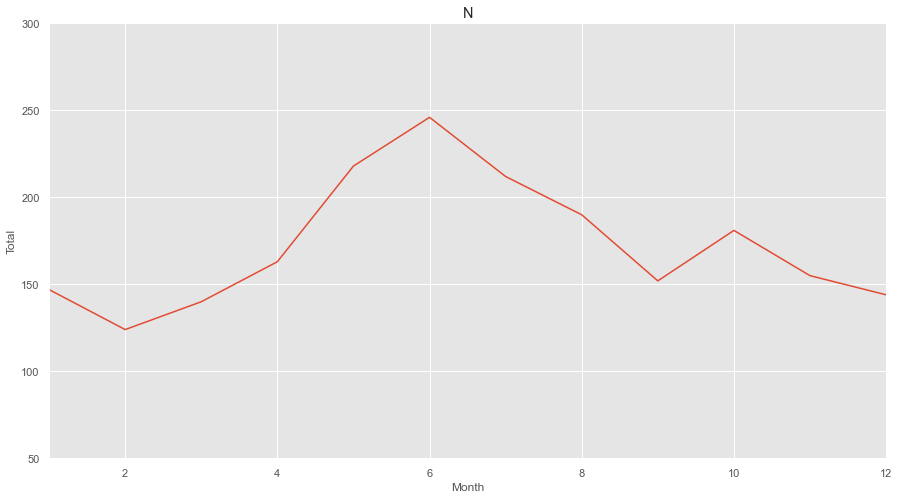

In [89]:
sns.lineplot(x='Month', y='Total', ci=95, data=ms.groupby(['Month']).count()['Total'].reset_index())
plt.ylim(50,300)
plt.xlim(1,12)

plt.title('N')

In [90]:
cumulative_week = ms.groupby('WeekOfYear').count()['Total'].reset_index()
cumulative_week.head()

,WeekOfYear,Total
0,1,38
1,2,43
2,3,27
3,4,28
4,5,25


In [91]:
cumulative_week['Cum'] = cumulative_week['Total'].cumsum()
cumulative_week.tail()

,WeekOfYear,Total,Cum
48,49,35,1964
49,50,43,2007
50,51,25,2032
51,52,33,2065
52,53,7,2072


In [92]:
data_2022 = pd.read_csv('2022shootings.csv')
data_2022.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2312678,"May 25, 2022",Pennsylvania,Philadelphia,3500 block of Fairmount Ave,0,4,NaN
1,2310278,"May 24, 2022",Texas,Uvalde,715 Old Carrizo Rd,22,17,NaN
2,2311123,"May 23, 2022",Ohio,Cleveland,St Clair Ave and E 152nd St,0,5,NaN
3,2309711,"May 23, 2022",South Carolina,North Charleston,7550 Dorchester Rd,0,5,NaN
4,2308096,"May 21, 2022",Indiana,Goshen,1204 Rosemare Ct,2,3,NaN


In [93]:
data_2022['Month'] = data_2022['Incident Date'].str.split(' ', expand=True).get(0)
data_2022['Day'] = data_2022['Incident Date'].str.split(' ', expand=True).get(1)
data_2022['Year'] = data_2022['Incident Date'].str.split(' ', expand=True).get(2)
data_2022.head()


,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Month,Day,Year
0,2312678,"May 25, 2022",Pennsylvania,Philadelphia,3500 block of Fairmount Ave,0,4,NaN,May,"25,",2022
1,2310278,"May 24, 2022",Texas,Uvalde,715 Old Carrizo Rd,22,17,NaN,May,"24,",2022
2,2311123,"May 23, 2022",Ohio,Cleveland,St Clair Ave and E 152nd St,0,5,NaN,May,"23,",2022
3,2309711,"May 23, 2022",South Carolina,North Charleston,7550 Dorchester Rd,0,5,NaN,May,"23,",2022
4,2308096,"May 21, 2022",Indiana,Goshen,1204 Rosemare Ct,2,3,NaN,May,"21,",2022


In [94]:
data_2022['Day'] = data_2022['Day'].str.split(',', expand=True).get(0)
data_2022.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Month,Day,Year
0,2312678,"May 25, 2022",Pennsylvania,Philadelphia,3500 block of Fairmount Ave,0,4,NaN,May,25,2022
1,2310278,"May 24, 2022",Texas,Uvalde,715 Old Carrizo Rd,22,17,NaN,May,24,2022
2,2311123,"May 23, 2022",Ohio,Cleveland,St Clair Ave and E 152nd St,0,5,NaN,May,23,2022
3,2309711,"May 23, 2022",South Carolina,North Charleston,7550 Dorchester Rd,0,5,NaN,May,23,2022
4,2308096,"May 21, 2022",Indiana,Goshen,1204 Rosemare Ct,2,3,NaN,May,21,2022


In [95]:
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i in range(len(data_2022['Incident ID'])):
    for m in range(len(meses)):
        if data_2022.loc[i,'Month'] == meses[m]:
            data_2022.loc[i, 'Mm'] = (m+1)
data_2022.head()


,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Month,Day,Year,Mm
0,2312678,"May 25, 2022",Pennsylvania,Philadelphia,3500 block of Fairmount Ave,0,4,NaN,May,25,2022,5.0
1,2310278,"May 24, 2022",Texas,Uvalde,715 Old Carrizo Rd,22,17,NaN,May,24,2022,5.0
2,2311123,"May 23, 2022",Ohio,Cleveland,St Clair Ave and E 152nd St,0,5,NaN,May,23,2022,5.0
3,2309711,"May 23, 2022",South Carolina,North Charleston,7550 Dorchester Rd,0,5,NaN,May,23,2022,5.0
4,2308096,"May 21, 2022",Indiana,Goshen,1204 Rosemare Ct,2,3,NaN,May,21,2022,5.0


In [96]:
data_2022['Date'] = pd.to_datetime(data_2022["Year"].astype(str) + "-" + data_2022["Mm"].astype(int).astype(str) + "-" + data_2022["Day"].astype(str))
data_2022.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Month,Day,Year,Mm,Date
0,2312678,"May 25, 2022",Pennsylvania,Philadelphia,3500 block of Fairmount Ave,0,4,NaN,May,25,2022,5.0,2022-05-25
1,2310278,"May 24, 2022",Texas,Uvalde,715 Old Carrizo Rd,22,17,NaN,May,24,2022,5.0,2022-05-24
2,2311123,"May 23, 2022",Ohio,Cleveland,St Clair Ave and E 152nd St,0,5,NaN,May,23,2022,5.0,2022-05-23
3,2309711,"May 23, 2022",South Carolina,North Charleston,7550 Dorchester Rd,0,5,NaN,May,23,2022,5.0,2022-05-23
4,2308096,"May 21, 2022",Indiana,Goshen,1204 Rosemare Ct,2,3,NaN,May,21,2022,5.0,2022-05-21


In [97]:
data_2022['WeekOfYear'] = data_2022['Date'].dt.weekofyear
data_2022.head()

<ipython-input-97-09fa48f30b85>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_2022['WeekOfYear'] = data_2022['Date'].dt.weekofyear


,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Month,Day,Year,Mm,Date,WeekOfYear
0,2312678,"May 25, 2022",Pennsylvania,Philadelphia,3500 block of Fairmount Ave,0,4,NaN,May,25,2022,5.0,2022-05-25,21
1,2310278,"May 24, 2022",Texas,Uvalde,715 Old Carrizo Rd,22,17,NaN,May,24,2022,5.0,2022-05-24,21
2,2311123,"May 23, 2022",Ohio,Cleveland,St Clair Ave and E 152nd St,0,5,NaN,May,23,2022,5.0,2022-05-23,21
3,2309711,"May 23, 2022",South Carolina,North Charleston,7550 Dorchester Rd,0,5,NaN,May,23,2022,5.0,2022-05-23,21
4,2308096,"May 21, 2022",Indiana,Goshen,1204 Rosemare Ct,2,3,NaN,May,21,2022,5.0,2022-05-21,20


In [98]:
acum_2022 = data_2022.groupby('WeekOfYear').count()['Incident ID'].reset_index()
acum_2022.head()

,WeekOfYear,Incident ID
0,1,6
1,2,6
2,3,6
3,4,6
4,5,10


In [99]:
acum_2022['Acumulative'] = acum_2022['Incident ID'].cumsum()
acum_2022.head()

,WeekOfYear,Incident ID,Acumulative
0,1,6,6
1,2,6,12
2,3,6,18
3,4,6,24
4,5,10,34


In [100]:
acum_2022 = acum_2022[acum_2022['WeekOfYear'] < 22]
acum_2022.head()

,WeekOfYear,Incident ID,Acumulative
0,1,6,6
1,2,6,12
2,3,6,18
3,4,6,24
4,5,10,34


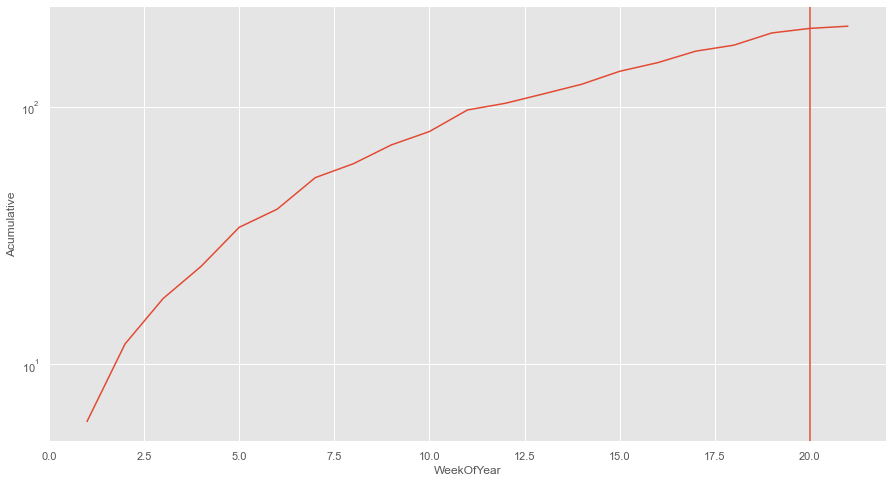

In [101]:
sns.lineplot(x='WeekOfYear', y='Acumulative', ci=0, data=acum_2022)
#plt.ylim(,3000)
plt.yscale('log')
plt.axvline(x=20)

In [102]:
cumulative_week['Avg'] = cumulative_week['Cum']/4
cumulative_week.head()

,WeekOfYear,Total,Cum,Avg
0,1,38,38,9.50
1,2,43,81,20.25
2,3,27,108,27.00
3,4,28,136,34.00
4,5,25,161,40.25


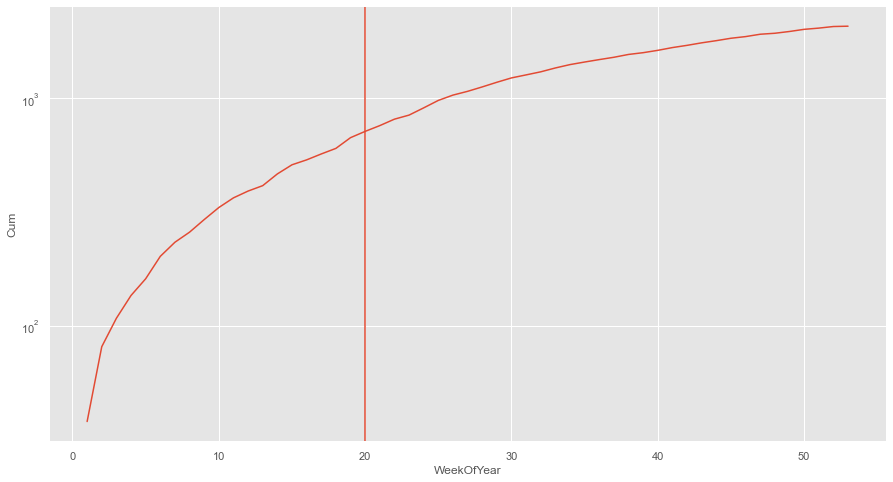

In [103]:
sns.lineplot(x='WeekOfYear', y='Cum', ci=0, data=cumulative_week)
#plt.ylim(,3000)
plt.yscale('log')
plt.axvline(x=20)
plt.savefig("inflex.pdf", transparent=True)

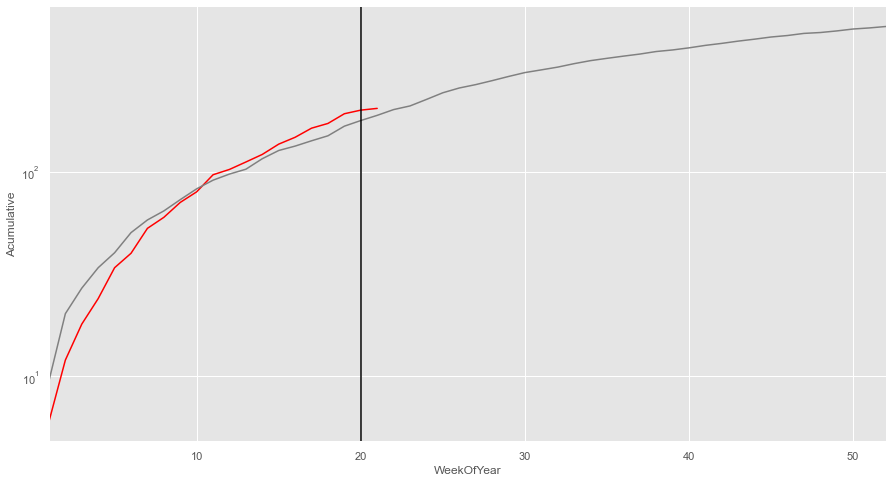

In [104]:
sns.lineplot(x='WeekOfYear', y='Acumulative', data=acum_2022, color='red')
sns.lineplot(x='WeekOfYear', y='Avg', ci=95, data=cumulative_week, color='gray')
plt.xlim(1,52)
plt.yscale('log')
plt.axvline(x=20, color='black')

plt.savefig("acum_2022_x_avg.pdf", transparent=True)

In [105]:
ms.head()

,Date,State,Dead,Injured,Total,Description,Month,Year,WeekDay,WeekOfYear,YearWeek
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,2018,0,1,2018 - 1
1,2019-01-01,Florida,0,5,5,Five people were shot and wounded around 3am l...,1,2019,1,1,2019 - 1
2,2019-01-01,South Carolina,0,5,5,Five people were shot and wounded outside of a...,1,2019,1,1,2019 - 1
3,2020-01-01,Puerto Rico,4,1,5,"A family of four, including nine-year-old twin...",1,2020,2,1,2020 - 1
4,2020-01-01,West Virginia,0,7,7,Seven people were wounded inside and out a hoo...,1,2020,2,1,2020 - 1


In [106]:
month_var = ms.groupby(['Year','State']).count()['Total'].reset_index()
month_var.head()

,Year,State,Total
0,2018,Alabama,12
1,2018,Arizona,3
2,2018,Arkansas,5
3,2018,California,33
4,2018,Colorado,7


In [107]:
month_var.groupby('State').count()['Year']

State
Alabama                 4
Alaska                  2
Arizona                 4
Arkansas                4
California              4
Colorado                4
Connecticut             4
Delaware                4
District of Columbia    4
Florida                 4
Georgia                 4
Hawaii                  1
Idaho                   2
Illinois                4
Indiana                 4
Iowa                    3
Kansas                  4
Kentucky                4
Louisiana               4
Maine                   1
Maryland                4
Massachusetts           4
Michigan                4
Minnesota               4
Mississippi             4
Missouri                4
Montana                 1
Nebraska                3
Nevada                  4
New Hampshire           1
New Jersey              4
New Mexico              4
New York                4
North Carolina          4
Ohio                    4
Oklahoma                4
Oregon                  3
Pennsylvania            4
Puerto

In [108]:
month_var_2018 = month_var[(month_var['Year'] == 2018)]
month_var_2021 = month_var[(month_var['Year'] == 2021)]


In [109]:
month_var_total = pd.merge(month_var_2018, month_var_2021, how='outer',on='State')
month_var_total.head()

,Year_x,State,Total_x,Year_y,Total_y
0,2018.0,Alabama,12.0,2021,23
1,2018.0,Arizona,3.0,2021,7
2,2018.0,Arkansas,5.0,2021,5
3,2018.0,California,33.0,2021,46
4,2018.0,Colorado,7.0,2021,13


In [110]:
month_var_total['Year_y'] = month_var_total['Year_y'].fillna(2021)
month_var_total['Year_x'] = month_var_total['Year_x'].fillna(2018)
month_var_total['Total_x'] = month_var_total['Total_x'].fillna(0)
month_var_total['Total_y'] = month_var_total['Total_y'].fillna(0)
month_var_total.head()

,Year_x,State,Total_x,Year_y,Total_y
0,2018.0,Alabama,12.0,2021,23
1,2018.0,Arizona,3.0,2021,7
2,2018.0,Arkansas,5.0,2021,5
3,2018.0,California,33.0,2021,46
4,2018.0,Colorado,7.0,2021,13


In [111]:
siglas = pd.read_excel('siglas.xlsx', index_col=0, header=1).reset_index().drop('index', axis=1)
siglas.head()

,STATE(TERRITORY),Unnamed: 2
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,American Samoa,AS


In [112]:
siglas['Sigla'] = siglas['Unnamed: 2']
siglas = siglas.drop('Unnamed: 2', axis=1)
siglas.head()

,STATE(TERRITORY),Sigla
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,American Samoa,AS


In [113]:
month_var_total = pd.merge(month_var_total, siglas, left_on='State', how='left', right_on='STATE(TERRITORY)').drop('STATE(TERRITORY)', axis=1)
month_var_total.head()

,Year_x,State,Total_x,Year_y,Total_y,Sigla
0,2018.0,Alabama,12.0,2021,23,AL
1,2018.0,Arizona,3.0,2021,7,AZ
2,2018.0,Arkansas,5.0,2021,5,AR
3,2018.0,California,33.0,2021,46,CA
4,2018.0,Colorado,7.0,2021,13,CO


In [114]:
month_var_total['Total_2018'] = month_var_total['Total_x']
month_var_total['Total_2021'] = month_var_total['Total_y']
month_var_total.head()

,Year_x,State,Total_x,Year_y,Total_y,Sigla,Total_2018,Total_2021
0,2018.0,Alabama,12.0,2021,23,AL,12.0,23
1,2018.0,Arizona,3.0,2021,7,AZ,3.0,7
2,2018.0,Arkansas,5.0,2021,5,AR,5.0,5
3,2018.0,California,33.0,2021,46,CA,33.0,46
4,2018.0,Colorado,7.0,2021,13,CO,7.0,13


In [115]:
month_var_total = month_var_total.drop(['Year_x','Year_y','Total_x','Total_y'], axis=1)
month_var_total.head()

,State,Sigla,Total_2018,Total_2021
0,Alabama,AL,12.0,23
1,Arizona,AZ,3.0,7
2,Arkansas,AR,5.0,5
3,California,CA,33.0,46
4,Colorado,CO,7.0,13


In [116]:
from adjustText import adjust_text

In [117]:
from matplotlib import patches

In [118]:
month_var_total['Total_2018'] = month_var_total['Total_2018'].astype(int)

In [119]:
month_var_total.head(50)

,State,Sigla,Total_2018,Total_2021
0,Alabama,AL,12,23
1,Arizona,AZ,3,7
2,Arkansas,AR,5,5
3,California,CA,33,46
4,Colorado,CO,7,13
5,Connecticut,CT,2,2
6,Delaware,DE,1,7
7,District of Columbia,DC,5,14
8,Florida,FL,28,31
9,Georgia,GA,7,24


In [120]:
month_var_total.describe()

,Total_2018,Total_2021
count,46.000000,46.000000
mean,7.000000,15.086957
std,8.243516,17.169516
min,0.000000,1.000000
25%,1.250000,2.000000
50%,4.000000,11.000000
75%,10.500000,21.250000
max,34.000000,87.000000


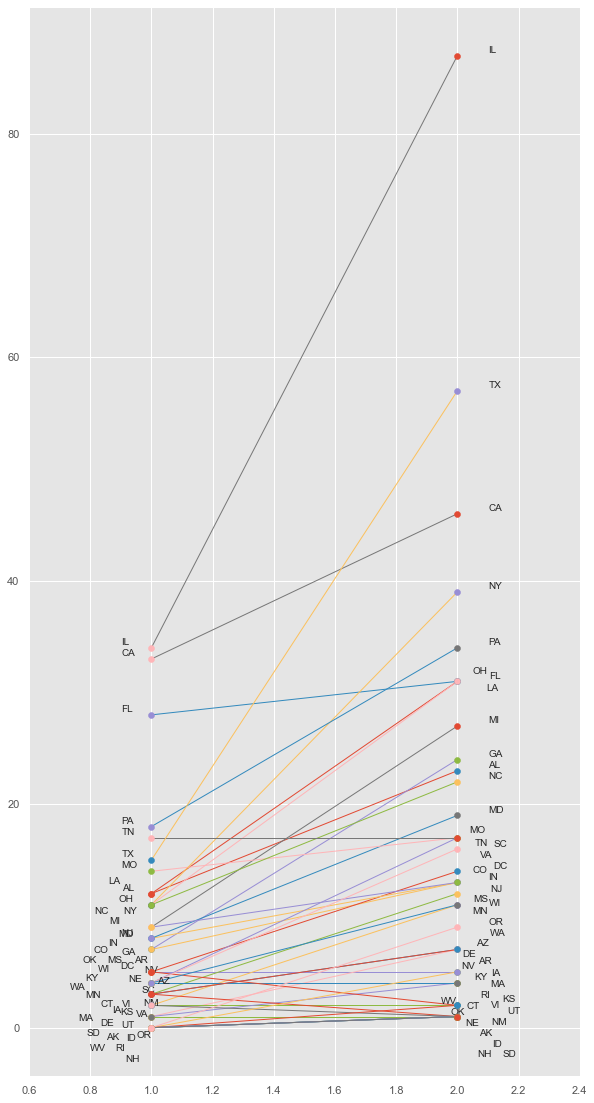

In [121]:
fig, ax = plt.subplots(figsize = (9, 18))
fig.subplots_adjust(left=0.05, right=0.90, top=0.9, bottom=0.075)
plt.xlim(0.6,2.4)
#plt.yscale('log', base=2)

for y0, y1 in zip(month_var_total['Total_2018'], month_var_total['Total_2021']):
    ax.plot([1, 2], [y0, y1], lw=1)
    ax.scatter(1, y0, zorder=10)
    ax.scatter(2, y1, zorder=10)

#patch = patches.Rectangle((-0.1, 0), 0.2, 100, fill=True, alpha=1)
    
#for i in range(len(month_var['State'])):
#    plt.text(1, month_var.loc[i, 'Total'], month_var.loc[i, 'Sigla'], horizontalalignment='right')
#    plt.text(2, month_var.loc[i, 'Total_2021'], month_var.loc[i, 'Sigla'])

text = [plt.text(0.9+np.random.random()/1000, month_var_total.loc[i, 'Total_2018'], month_var_total.loc[i, 'Sigla'], horizontalalignment='center') for i in range(len(month_var_total['State']))]
adjust_text(text)
text_2 = [plt.text(2.1+np.random.random()/1000, month_var_total.loc[i, 'Total_2021'], month_var_total.loc[i, 'Sigla'],horizontalalignment='left') for i in range(len(month_var_total['State']))]
adjust_text(text_2)

plt.savefig("2018_x_2021.pdf", transparent=True)

In [122]:
month_var_log = month_var_total

In [123]:
month_var_log['State'] = month_var_log['State'].replace(0,0.5)

7

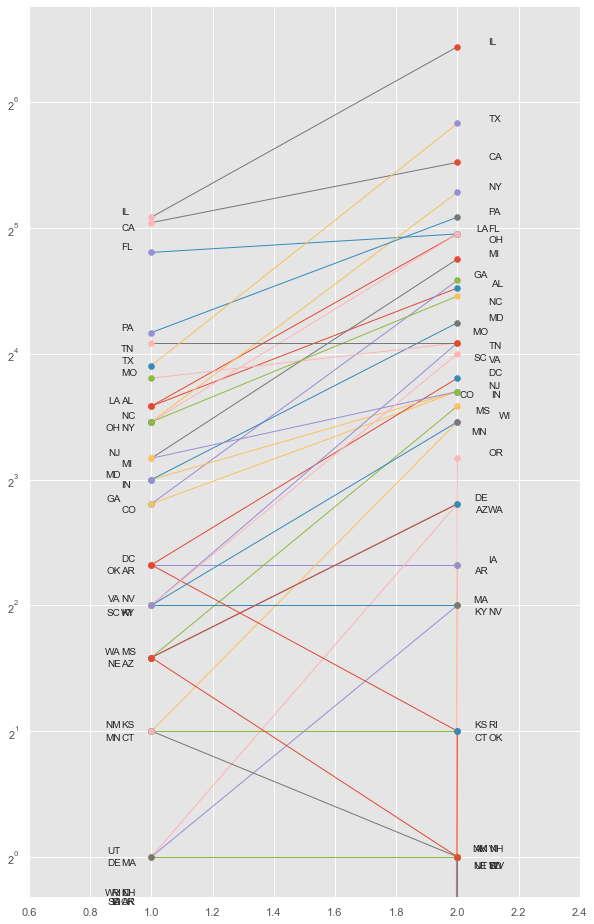

In [124]:
fig, ax = plt.subplots(figsize = (9, 15))
fig.subplots_adjust(left=0.05, right=0.90, top=0.9, bottom=0.075)
plt.xlim(0.6,2.4)
plt.ylim()
plt.yscale('log', base=2)

for y0, y1 in zip(month_var_log['Total_2018'], month_var_log['Total_2021']):
    ax.plot([1, 2], [y0, y1], lw=1)
    ax.scatter(1, y0, zorder=10)
    ax.scatter(2, y1, zorder=10)

#patch = patches.Rectangle((-0.1, 0), 0.2, 100, fill=True, alpha=1)
    
#for i in range(len(month_var['State'])):
#    plt.text(1, month_var.loc[i, 'Total'], month_var.loc[i, 'Sigla'], horizontalalignment='right')
#    plt.text(2, month_var.loc[i, 'Total_2021'], month_var.loc[i, 'Sigla'])

text = [plt.text(0.9+np.random.random()/1000, month_var_log.loc[i, 'Total_2018'], month_var_log.loc[i, 'Sigla'], horizontalalignment='center') for i in range(len(month_var_log['State']))]
adjust_text(text,  ha='right', va='center', force_text=(0.75, 0), force_objects=(1, 0),expand_text=(1.05, 1), autoalign='xy')
text_2 = [plt.text(2.1+np.random.random()/1000, month_var_log.loc[i, 'Total_2021'], month_var_log.loc[i, 'Sigla'],horizontalalignment='left') for i in range(len(month_var_log['State']))]
adjust_text(text_2,  ha='left', va='center', force_text=(1, 1), force_objects=(0.1, 0.25),expand_text=(1.05, 1), autoalign='xy')

In [125]:
by_day_dist = by_day_dist.sort_values('Description', ascending = False)


In [126]:
zero = [{'Description': 0, 'Date': 461}]
by_day_dist = by_day_dist.append(zero)
by_day_dist

,Description,Date
10,16,1
9,11,1
8,9,2
7,8,4
6,7,7
5,6,24
4,5,31
3,4,68
2,3,134
1,2,265


In [127]:
by_day_dist = by_day_dist.sort_values('Description').reset_index().drop('index', axis=1)
by_day_dist

,Description,Date
0,0,461
1,1,443
2,2,265
3,3,134
4,4,68
5,5,31
6,6,24
7,7,7
8,8,4
9,9,2


In [128]:
range(len(by_day_dist['Description']))

range(0, 12)

In [129]:
by_day_poisson = pd.read_csv('proj_poisson.csv', sep=';', encoding='latin')
by_day_poisson.head()

,Dias,Projeção
0,0,354
1,1,502
2,2,356
3,3,168
4,4,60


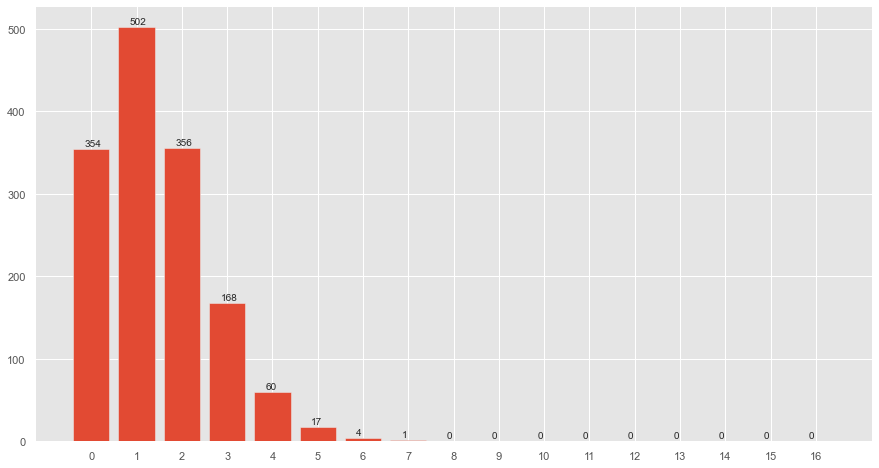

In [130]:
x_pos = np.arange(17)
fig, ax = plt.subplots()
ax.bar(by_day_poisson['Dias'], by_day_poisson['Projeção'])
plt.xticks(x_pos, x_pos)

#for i in range(len(by_day_poisson['Dias'])):
#    plt.text( by_day_poisson.loc[i,'Dias'], by_day_poisson.loc[i,'Projeção'], by_day_poisson.loc[i, 'Projeção'], horizontalalignment='center')
#   plt.text(2,                                 month_var.loc[i, 'Total_2021'], month_var.loc[i, 'State'])

texto = [plt.text( (by_day_poisson.loc[i,'Dias'] - 0.15), by_day_poisson.loc[i,'Projeção'], by_day_poisson.loc[i, 'Projeção'], horizontalalignment='left') for i in range(len(by_day_poisson['Dias']))]
adjust_text(texto, ha='left')

plt.savefig("poisson_dist.pdf", transparent=True)

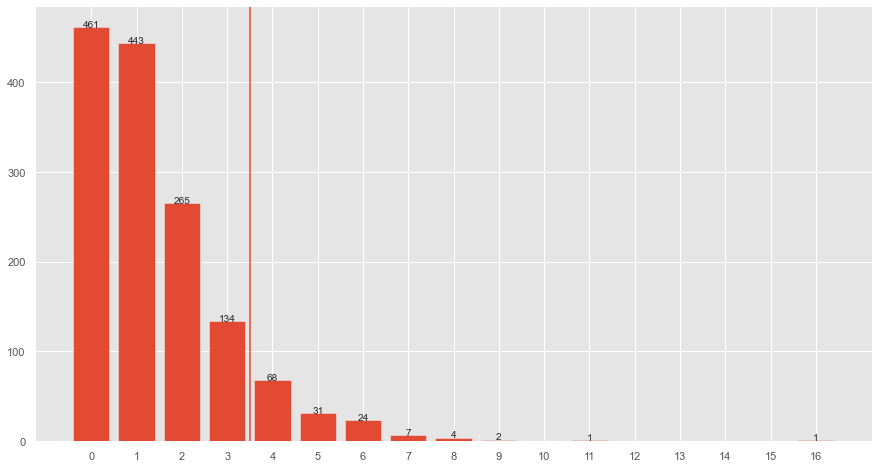

In [131]:
x_pos = np.arange(17)
fig, ax = plt.subplots()
ax.bar(by_day_dist['Description'], by_day_dist['Date'])
plt.xticks(x_pos, x_pos)
plt.axvline(x=3.5)


for i in range(len(by_day_dist['Date'])):
    plt.text( by_day_dist.loc[i,'Description'], by_day_dist.loc[i,'Date'], by_day_dist.loc[i, 'Date'], horizontalalignment='center')
#   plt.text(2,                                 month_var.loc[i, 'Total_2021'], month_var.loc[i, 'State'])

plt.savefig("actual_dist.pdf", transparent=True)

In [132]:
data_2022.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Month,Day,Year,Mm,Date,WeekOfYear
0,2312678,"May 25, 2022",Pennsylvania,Philadelphia,3500 block of Fairmount Ave,0,4,NaN,May,25,2022,5.0,2022-05-25,21
1,2310278,"May 24, 2022",Texas,Uvalde,715 Old Carrizo Rd,22,17,NaN,May,24,2022,5.0,2022-05-24,21
2,2311123,"May 23, 2022",Ohio,Cleveland,St Clair Ave and E 152nd St,0,5,NaN,May,23,2022,5.0,2022-05-23,21
3,2309711,"May 23, 2022",South Carolina,North Charleston,7550 Dorchester Rd,0,5,NaN,May,23,2022,5.0,2022-05-23,21
4,2308096,"May 21, 2022",Indiana,Goshen,1204 Rosemare Ct,2,3,NaN,May,21,2022,5.0,2022-05-21,20


Text(0.5, 1.0, 'N')

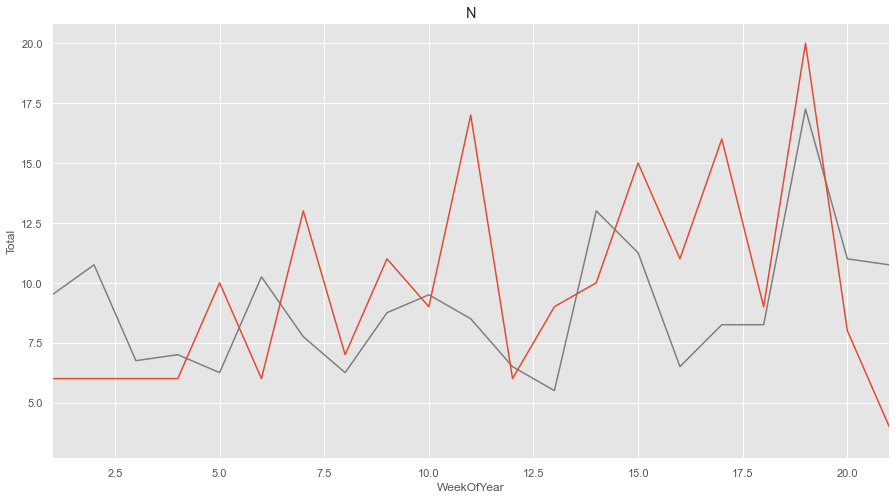

In [133]:
sns.lineplot(x='WeekOfYear', y='Total', ci=0, data=ms.groupby(['Year','WeekOfYear']).count()['Total'].reset_index(), color='gray')
sns.lineplot(x='WeekOfYear', y='Incident ID', ci=0, data=data_2022.groupby(['WeekOfYear']).count()['Incident ID'].reset_index())
#plt.ylim(20,80)
plt.xlim(1,21)
plt.title('N')

Text(0.5, 1.0, 'N')

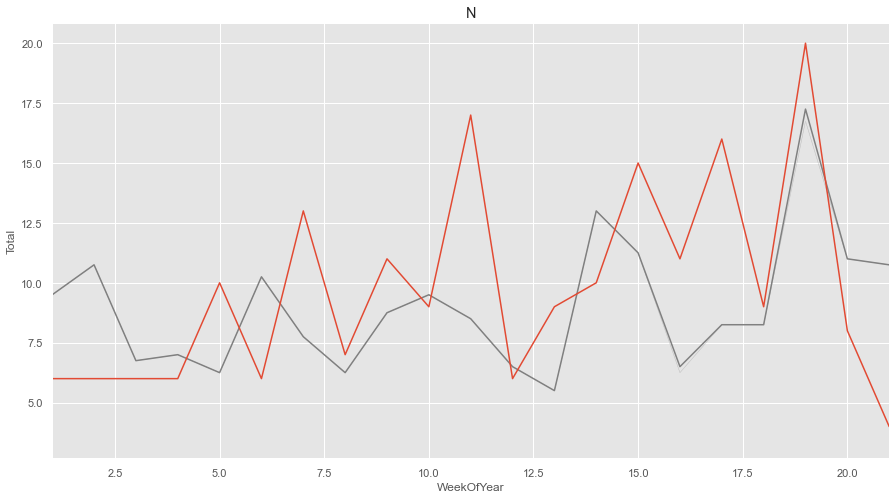

In [134]:
sns.lineplot(x='WeekOfYear', y='Total', ci=0, data=ms.groupby(['Year','WeekOfYear']).count()['Total'].reset_index(), color='gray')
sns.lineplot(x='WeekOfYear', y='Incident ID', ci=0, data=data_2022.groupby(['WeekOfYear']).count()['Incident ID'].reset_index())
#plt.ylim(20,80)
plt.xlim(1,21)
plt.title('N')

In [135]:
data_2022.groupby(['WeekOfYear']).count()['Incident ID'].reset_index().head()

,WeekOfYear,Incident ID
0,1,6
1,2,6
2,3,6
3,4,6
4,5,10


In [136]:
data_2022['Year'] = 2022
merge_2022 = data_2022.groupby(['Year','WeekOfYear']).count()['Incident ID'].reset_index()
merge_2022['Total'] = merge_2022['Incident ID']
merge_2022.head()

,Year,WeekOfYear,Incident ID,Total
0,2022,1,6,6
1,2022,2,6,6
2,2022,3,6,6
3,2022,4,6,6
4,2022,5,10,10


In [137]:
merge_2022 = merge_2022.drop('Incident ID', axis=1)

In [138]:
merge_years = ms.groupby(['Year','WeekOfYear']).count()['Total'].reset_index()
merge_years.head()

,Year,WeekOfYear,Total
0,2018,1,6
1,2018,2,7
2,2018,3,4
3,2018,4,8
4,2018,5,2


In [139]:
full_week = pd.concat([merge_years,merge_2022]).reset_index().drop('index', axis=1)
full_week.head()

,Year,WeekOfYear,Total
0,2018,1,6
1,2018,2,7
2,2018,3,4
3,2018,4,8
4,2018,5,2


In [140]:
full_week = full_week[full_week['WeekOfYear'] < 22]

In [141]:
#full_week['WeekOfYear'] = full_week['WeekOfYear'].astype(str)

In [142]:
full_week = full_week.sort_values(['WeekOfYear'], ascending=True)

In [143]:
full_week['WeekOfYear'] = full_week['WeekOfYear'].astype(str)

<AxesSubplot:xlabel='Total', ylabel='WeekOfYear'>

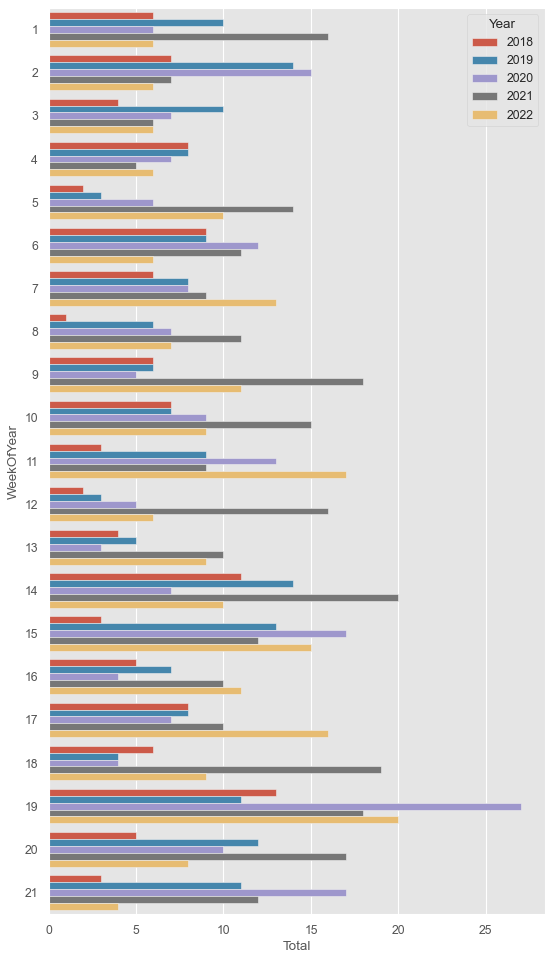

In [144]:
plt.figure(figsize=(8, 15), dpi=80)
sns.barplot(x='Total', y='WeekOfYear', data=full_week, hue='Year')


Text(0.5, 1.0, 'N')

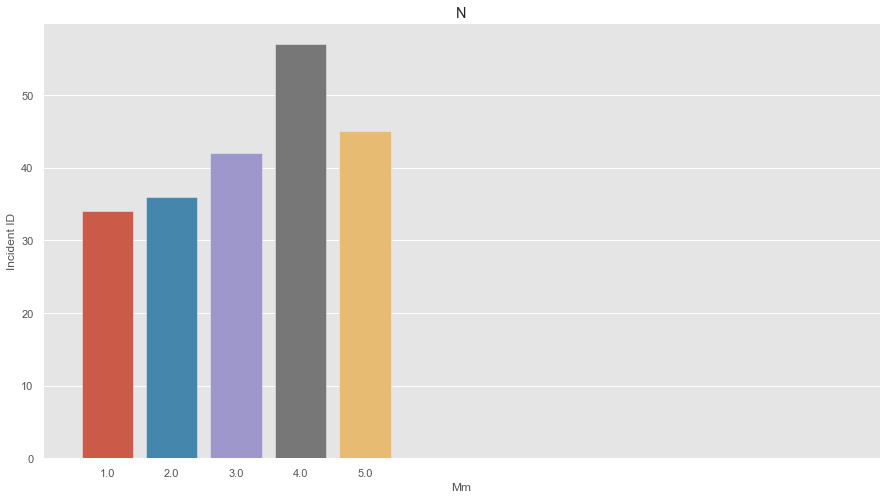

In [145]:
sns.barplot(x='Mm', y='Incident ID', ci=0, data=data_2022.groupby(['Mm']).count()['Incident ID'].reset_index())
#plt.ylim(20,80)
plt.xlim(-1,12)
plt.title('N')

In [146]:
ms.groupby(['Year','Month']).count()['Total'].reset_index()

,Year,Month,Total
0,2018,1,25
1,2018,2,19
2,2018,3,19
3,2018,4,30
4,2018,5,26
5,2018,6,42
6,2018,7,34
7,2018,8,25
8,2018,9,18
9,2018,10,29


(-1.0, 12.0)

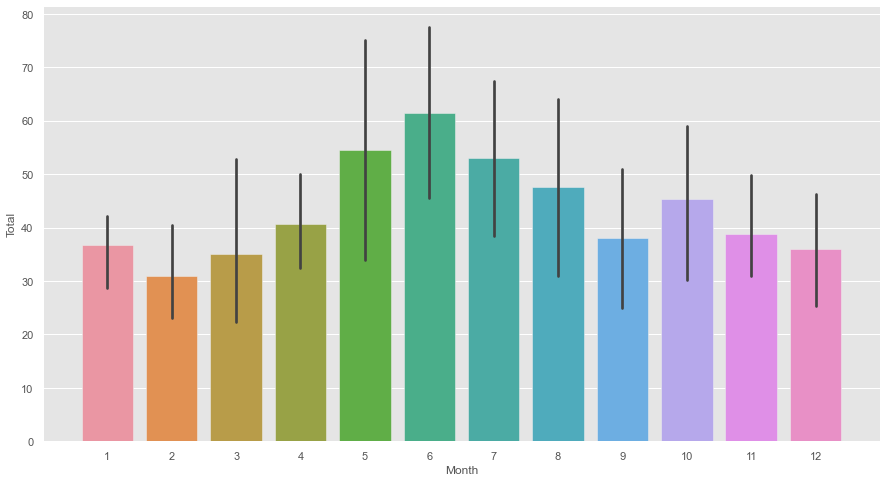

In [147]:
sns.barplot(x='Month', y='Total', ci=95, data=ms.groupby(['Year','Month']).count()['Total'].reset_index())
plt.xlim(-1,12)

In [148]:
month_var_total['Pct'] = ((month_var_total['Total_2021'] - 1)/month_var_total['Total_2018'])*100
month_var_total.head()

,State,Sigla,Total_2018,Total_2021,Pct
0,Alabama,AL,12,23,183.333333
1,Arizona,AZ,3,7,200.000000
2,Arkansas,AR,5,5,80.000000
3,California,CA,33,46,136.363636
4,Colorado,CO,7,13,171.428571


In [149]:
month_var_total[month_var_total['State'] == 'Illinois']

,State,Sigla,Total_2018,Total_2021,Pct
10,Illinois,IL,34,87,252.941176
